In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,StandardScaler, scale
from sklearn.model_selection import train_test_split  # Libraries for ML
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics,tree
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve, KFold, cross_val_score, GridSearchCV
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings



In [2]:
df = pd.read_csv('Type_Transport.csv')

# Please only two decimals in the output!!
# This line will give us just two decimals for every pd dataframe displayed
pd.set_option('display.float_format', lambda x: '%.2f' % x) 

df.head()

,Year,Country_Vehicle,value
0,1990,AT_BUS,11.00
1,1990,AT_CAR,77.10
2,1990,AT_TRN,11.90
3,1990,BE_BUS,10.60
4,1990,BE_CAR,83.30


In [3]:
df.shape

(1728, 3)

In [4]:
# # Box plot to identify outliers
# sns.boxplot(x='Luas_Line', y='VALUE', data=df)
# plt.show()


In [5]:
# from scipy import stats

# # Calculate z-scores
# z_scores = stats.zscore(df['VALUE'])

# # Define a threshold for outliers, e.g., 3 standard deviations
# threshold = 1
# outliers = (z_scores > threshold) | (z_scores < -threshold)

# # Print and visualize outliers
# print("Indices of outliers:", df[outliers].index)


In [6]:
# # Remove outliers
# df_no_outliers = df[~outliers]

# # Check the shape of the new dataframe
# print("Shape after removing outliers:", df_no_outliers.shape)


In [7]:
# Move the 'Year' column to the second position
df.insert(1, 'Year', df.pop('Year'))

In [8]:
# Counting the values that each year has:
year_counts = df['Year'].value_counts().sort_index()
year_counts

Year
1990    54
1991    54
1992    54
1993    54
1994    54
1995    54
1996    54
1997    54
1998    54
1999    54
2000    54
2001    54
2002    54
2003    54
2004    54
2005    54
2006    54
2007    54
2008    54
2009    54
2010    54
2011    54
2012    54
2013    54
2014    54
2015    54
2016    54
2017    54
2018    54
2019    54
2020    54
2021    54
Name: count, dtype: int64

In [9]:
# Cambiar 
# Modify the code to filter based on substrings
df = df[df['Country_Vehicle'].str.contains('IE|HU', case=False, na=False)]
df.reset_index(drop=True, inplace=True)

In [10]:
df

,Country_Vehicle,Year,value
0,HU_BUS,1990,24.80
1,HU_CAR,1990,60.50
2,HU_TRN,1990,14.70
3,IE_BUS,1990,11.50
4,IE_CAR,1990,84.90
...,...,...,...
187,HU_CAR,2021,79.30
188,HU_TRN,2021,6.40
189,IE_BUS,2021,13.00
190,IE_CAR,2021,85.70


In [11]:
# Creating a LabelEncoder instance
le = LabelEncoder()

# Encoding the 'Sex' column
df['Country_Vehicle'] = le.fit_transform(df['Country_Vehicle'])
pd.set_option('display.float_format', lambda x: '%.2f' % x) 
df

,Country_Vehicle,Year,value
0,0,1990,24.80
1,1,1990,60.50
2,2,1990,14.70
3,3,1990,11.50
4,4,1990,84.90
...,...,...,...
187,1,2021,79.30
188,2,2021,6.40
189,3,2021,13.00
190,4,2021,85.70


Encoding target variable *"Luas_Line"*:<br>
*"Red Line"* = 0 <br>
*"Green Line"* = 1<br>
Defining X and y variables:

In [12]:
X = df.iloc[:, [1,2]].values # Dependent variables
y = df.iloc[:, 0].values # Target variable

In [13]:
X

array([[1.990e+03, 2.480e+01],
       [1.990e+03, 6.050e+01],
       [1.990e+03, 1.470e+01],
       [1.990e+03, 1.150e+01],
       [1.990e+03, 8.490e+01],
       [1.990e+03, 3.600e+00],
       [1.991e+03, 2.340e+01],
       [1.991e+03, 6.320e+01],
       [1.991e+03, 1.330e+01],
       [1.991e+03, 1.190e+01],
       [1.991e+03, 8.430e+01],
       [1.991e+03, 3.700e+00],
       [1.992e+03, 2.290e+01],
       [1.992e+03, 6.390e+01],
       [1.992e+03, 1.320e+01],
       [1.992e+03, 1.230e+01],
       [1.992e+03, 8.420e+01],
       [1.992e+03, 3.500e+00],
       [1.993e+03, 2.320e+01],
       [1.993e+03, 6.450e+01],
       [1.993e+03, 1.240e+01],
       [1.993e+03, 1.260e+01],
       [1.993e+03, 8.380e+01],
       [1.993e+03, 3.600e+00],
       [1.994e+03, 2.350e+01],
       [1.994e+03, 6.430e+01],
       [1.994e+03, 1.220e+01],
       [1.994e+03, 1.360e+01],
       [1.994e+03, 8.300e+01],
       [1.994e+03, 3.400e+00],
       [1.995e+03, 2.360e+01],
       [1.995e+03, 6.440e+01],
       [

In [14]:
y

array([0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3,
       4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1,
       2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5,
       0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3,
       4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1,
       2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5,
       0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3,
       4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1,
       2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5])

## Splitting the dataset into the Training set and Test set

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## Feature Scaling

In [16]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# DecisionTreeClassifier
## Training the Decision Tree Classification model on the Training set

In [17]:
classifier = DecisionTreeClassifier(max_depth = 4, random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

## Predicting the Test and set results

In [18]:
y_pred = classifier.predict(X_test)

## Making the Confusion Matrix

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       1.00      1.00      1.00        12
           2       0.92      0.92      0.92        12
           3       0.71      0.83      0.77         6
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         9

    accuracy                           0.95        58
   macro avg       0.94      0.94      0.94        58
weighted avg       0.95      0.95      0.95        58

Classifier Accuracy: 94.83


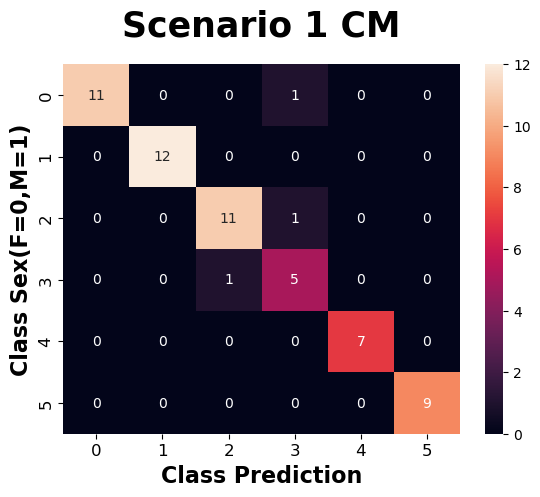

In [19]:
from sklearn.metrics import confusion_matrix # We need to reimport this libary, otherwise breaks

# Calculating confusion matrix

cm = confusion_matrix(y_test, y_pred)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True,fmt='d')
plt.title('Scenario 1 CM',loc="center", pad=20, fontsize=25, fontweight="bold")
plt.xlabel('Class Prediction',fontsize=16, fontweight='bold')
plt.ylabel('Class Sex(F=0,M=1)',fontsize=16, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# We don't want scientific notation
np.set_printoptions(suppress=True)

# print the classification_report based on y_test and y_predict
print(classification_report(y_test, y_pred))
# Which is the accuracy for the classifier???
print("Classifier Accuracy:",round(metrics.accuracy_score(y_test, y_pred),4)*100)

tree=metrics.accuracy_score(y_test, y_pred)*100

In [20]:
# instantiate the classifier 
rfc = RandomForestClassifier(random_state=0,verbose=10)

# fit the model
rfc.fit(X_train, y_train)

# Predict the Test set results
y_pred = rfc.predict(X_test)

print('Model accuracy score with 10 decision-trees : {0:0.2f}'. format(accuracy_score(y_test, y_pred)*100))
randomforest = accuracy_score(y_test, y_pred)*100

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elap

## Creating a K-Nearest Neighbor Classifier

In [21]:
neighbors = np.arange(1, 20)                  # number of neighbors
train_accuracy = np.zeros(len(neighbors))    # Declare and initialise the matrix
test_accuracy = np.zeros(len(neighbors))     # Declare and initialise the matrix

In [22]:
for i,k in enumerate(neighbors):                          # for loop that checks the model for neighbor values 1, 2, 3, ..., 9
    knn = KNeighborsClassifier(n_neighbors = k)           # Initialise an object knn using KNeighborsClassifier method

    #Fit the model
    knn.fit(X_train, y_train)                      # Call fit method to implement the ML KNeighborsClassifier model

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)      # Save the score value in the train_accuracy array

    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)      # Save the score value in the train_accuracy array

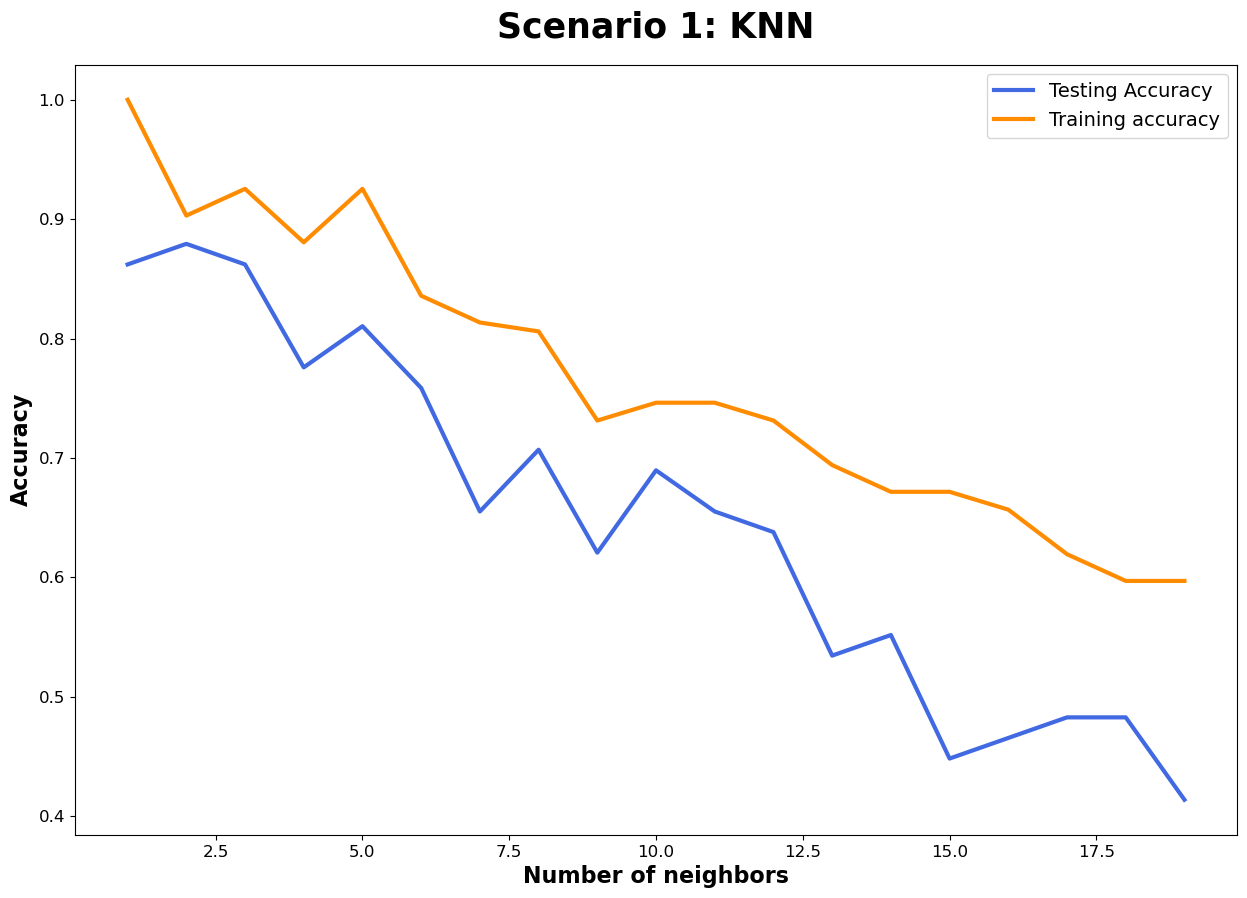

In [23]:
plt.figure(figsize=(15, 10))
plt.title('Scenario 1: KNN',loc="center", pad=20, fontsize=25, fontweight="bold")
plt.plot(neighbors, test_accuracy, label='Testing Accuracy', linewidth=3, color='royalblue')
plt.plot(neighbors, train_accuracy, label='Training accuracy', linewidth=3, color='darkorange')

plt.xlabel('Number of neighbors',fontsize=16, fontweight='bold')
plt.ylabel('Accuracy',fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend( loc='best', fontsize=14)
plt.show()

In [24]:
# Declare and initialise an object 'KNeighborsClassifier' with 3 neighbors
knn = KNeighborsClassifier(n_neighbors = 3)

# Fit the model
knn.fit(X_train, y_train)   

# Compute accuracy on the training set
train_accuracy = knn.score(X_train, y_train)   

# Compute accuracy on the test set
test_accuracy = knn.score(X_test, y_test)  

In [25]:
# Display the test accuracy

print('Test accuracy = ', round(test_accuracy*100,2))
KNN=test_accuracy*100

Test accuracy =  86.21


# Parameter tunning GridSearch

In [26]:
# scaling the features

X_scaled = scale(X)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

## Model Building

In [27]:
# using rbf kernel, C=1, default value of gamma

model = SVC(C = 1, kernel='rbf')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


              precision    recall  f1-score   support

           0       0.73      1.00      0.84         8
           1       1.00      1.00      1.00         5
           2       0.22      0.50      0.31         4
           3       0.00      0.00      0.00        10
           4       1.00      1.00      1.00         8
           5       0.67      1.00      0.80         4

    accuracy                           0.69        39
   macro avg       0.60      0.75      0.66        39
weighted avg       0.57      0.69      0.62        39

accuracy 0.6923076923076923
precision 0.5736855736855737
recall 0.6923076923076923


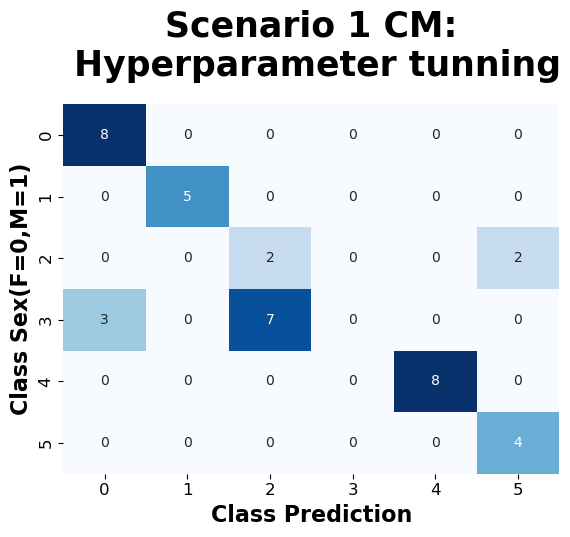

In [28]:
from sklearn.metrics import confusion_matrix

# confusion matrix
confusion_matrix(y_true=y_test, y_pred=y_pred)

# Generate the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)

# Create a heatmap of the confusion matrix

sns.heatmap(confusion_matrix, annot = True, fmt = "d", cmap = "Blues", cbar = False, )
plt.title('Scenario 1 CM:\n Hyperparameter tunning',loc="center", pad=20, fontsize=25, fontweight="bold")
plt.xlabel('Class Prediction',fontsize=16, fontweight='bold')
plt.ylabel('Class Sex(F=0,M=1)',fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Printing classification report
print(classification_report(y_test, y_pred))

# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred))

svc = metrics.accuracy_score(y_test, y_pred)*100

# precision
print("precision", metrics.precision_score(y_test, y_pred, average='weighted'))

# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred, average='weighted'))

## Grid Search to Find Optimal Hyperparameters

In [29]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 0)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [0.01, 0.001, 0.0001],
                     'C': [1, 10, 100, 1000]}]#,
                


# specify model
model = SVC(kernel = "rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring = 'accuracy', 
                        cv = folds, 
                        verbose = 4, # Changing verbose from 1 to 4, to display records :)
                        return_train_score = True)      

# fit the model
model_cv.fit(X_train, y_train)     

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END C=1, gamma=0.01;, score=(train=0.533, test=0.387) total time=   0.0s
[CV 2/5] END C=1, gamma=0.01;, score=(train=0.377, test=0.290) total time=   0.0s
[CV 3/5] END C=1, gamma=0.01;, score=(train=0.361, test=0.355) total time=   0.0s
[CV 4/5] END C=1, gamma=0.01;, score=(train=0.382, test=0.400) total time=   0.0s
[CV 5/5] END C=1, gamma=0.01;, score=(train=0.472, test=0.267) total time=   0.0s
[CV 1/5] END C=1, gamma=0.001;, score=(train=0.197, test=0.129) total time=   0.0s
[CV 2/5] END C=1, gamma=0.001;, score=(train=0.205, test=0.097) total time=   0.0s
[CV 3/5] END C=1, gamma=0.001;, score=(train=0.189, test=0.161) total time=   0.0s
[CV 4/5] END C=1, gamma=0.001;, score=(train=0.220, test=0.200) total time=   0.0s
[CV 5/5] END C=1, gamma=0.001;, score=(train=0.195, test=0.100) total time=   0.0s
[CV 1/5] END C=1, gamma=0.0001;, score=(train=0.197, test=0.129) total time=   0.0s
[CV 2/5] END C=1, gamma=0.0001

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=4)

In [30]:
## cv results
cv_results = pd.DataFrame(model_cv.cv_results_)

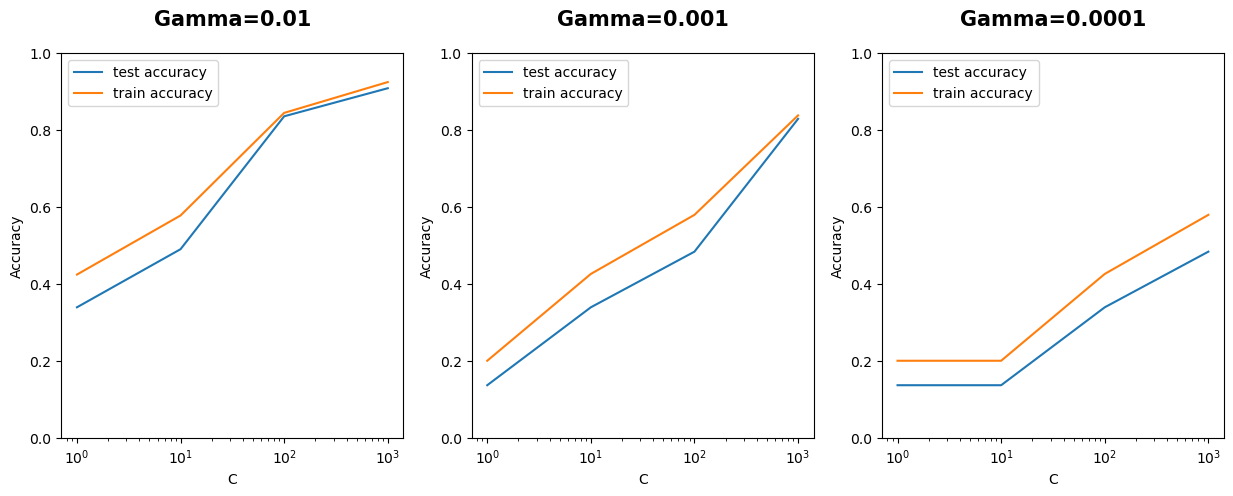

In [31]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(15,5))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01",fontweight="bold",loc="center", pad=20, fontsize=15)
plt.ylim([0, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001",fontweight="bold",loc="center", pad=20, fontsize=15)
plt.ylim([0, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001",fontweight="bold",loc="center", pad=20, fontsize=15)
plt.ylim([0, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [32]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_
print('Tree:',tree)
print('RF:',randomforest)
print('KNN:',KNN)
print('SVC:',svc)
print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

Tree: 94.82758620689656
RF: 93.10344827586206
KNN: 86.20689655172413
SVC: 69.23076923076923
The best test score is 0.9088172043010753 corresponding to hyperparameters {'C': 1000, 'gamma': 0.01}


# PCA and Clustering

In [33]:
# df = pd.read_csv('Type_Transport.csv')

# # Please only two decimals in the output!!
# # This line will give us just two decimals for every pd dataframe displayed
# pd.set_option('display.float_format', lambda x: '%.2f' % x) 

# df.head()

In [34]:
# # Creating a LabelEncoder instance
# le = LabelEncoder()

# # Encoding the 'Sex' column
# df['Country_Vehicle'] = le.fit_transform(df['Country_Vehicle'])
# pd.set_option('display.float_format', lambda x: '%.2f' % x) 
# df

In [35]:
# Importing standardscalar module 
from sklearn.preprocessing import StandardScaler
  
scalar = StandardScaler()
  
# fitting
scalar.fit(df)
scaled_data = scalar.transform(df)
  
# Importing PCA
from sklearn.decomposition import PCA
  
# Let's say, components = 2
pca = PCA(n_components = 2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
  
x_pca.shape

(192, 2)

In [36]:
print(x_pca[:, 0])

[-0.83521234 -1.25542211  0.22888631  0.71770423 -0.58349125  1.73039257
 -0.80252898 -1.31854887  0.26156966  0.70832461 -0.56950255  1.72802344
 -0.79087712 -1.33493899  0.2638742   0.69894499 -0.56719802  1.73266481
 -0.79791991 -1.34899228  0.28253656  0.69190219 -0.55788298  1.73029568
 -0.8049627  -1.34435091  0.28717793  0.66850158 -0.53922062  1.73493705
 -0.80733183 -1.34672004  0.2918193   0.66846928 -0.53925292  1.73490476
 -0.84007977 -1.31871035  0.29646067  0.67077382 -0.54629571  1.73720929
 -0.81674375 -1.33977413  0.29409154  0.67541519 -0.546328    1.73484017
 -0.80976554 -1.33980643  0.28704875  0.67538289 -0.54869713  1.7371447
 -0.81914517 -1.31413357  0.27065863  0.6753506  -0.54872943  1.73711241
 -0.84020895 -1.29313438  0.27062633  0.60755017 -0.48333042  1.73941695
 -0.83790442 -1.28381934  0.25890988  0.60985471 -0.48102589  1.73704782
 -0.83326305 -1.27450431  0.24719342  0.62150657 -0.49274234  1.73234186
 -0.83095851 -1.29089443  0.25884529  0.62848477 -0.

Text(0, 0.5, 'Second Principal Component')

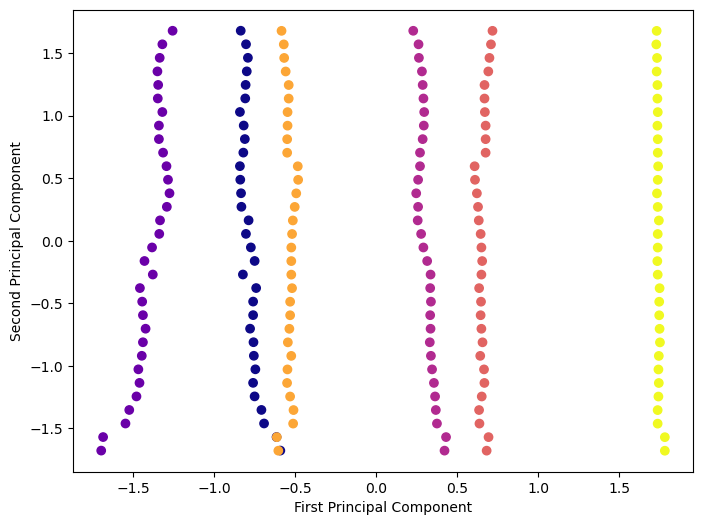

In [37]:
# giving a larger plot
plt.figure(figsize =(8, 6))
  
plt.scatter(x_pca[:, 0], x_pca[:, 1], c = df['Country_Vehicle'], cmap ='plasma')
  
# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [38]:
# Display components
pca.components_, pca.explained_variance_ratio_

(array([[ 0.70710672, -0.00029819, -0.70710678],
        [-0.0004217 , -0.99999991, -0.        ]]),
 array([0.35691041, 0.33333333]))

In [39]:
df_comp = pd.DataFrame(pca.components_, columns = df['Country_Vehicle'])
  
plt.figure(figsize =(14, 6))
  
# plotting heatmap
sns.heatmap(df['Country_Vehicle'])

ValueError: Shape of passed values is (2, 3), indices imply (2, 192)

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# generate synthetic two-dimensional data
X, y = make_blobs(random_state = 1)

# build the clustering model
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)

In [ ]:
import mglearn
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers = 'o')
mglearn.discrete_scatter(
kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2], markers = '^', markeredgewidth = 5)

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (10, 5))

# using two cluster centers:
kmeans1 = KMeans(n_clusters =  2)
kmeans1.fit(X)
assignments = kmeans1.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax = axes[0], markers = 'o')
mglearn.discrete_scatter(
kmeans1.cluster_centers_[:, 0], kmeans1.cluster_centers_[:, 1], [0, 1], ax = axes[0], markers = '^', markeredgewidth = 4)

# using five cluster centers:
kmeans2 = KMeans(n_clusters = 5)
kmeans2.fit(X)
assignments = kmeans2.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax = axes[1], markers = 'o')
mglearn.discrete_scatter(
kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1], [0, 1, 2, 3, 4], ax = axes[1], markers = '^', markeredgewidth = 4)